In [37]:
import pickle
import os
import time
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
import datetime


In [38]:
NAME = f"cat_vs_dogs_4c2_2n{time.time()}"
tensorboard = TensorBoard(log_dir=f"logs\\{NAME}\\")

In [39]:
X = pickle.load(open("X.pkl", "rb"))
Y = pickle.load(open("Y.pkl", "rb"))


In [40]:
X=X/255  # nefunguje pro 300 x 300 

In [41]:
print(X.shape, Y.shape)
print(Y)
print(X[0])


(10, 150, 150, 3) (10,)
[0 0 1 1 1 0 1 1 0 0]
[[[0.14509804 0.14117647 0.15686275]
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  ...
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  [0.14509804 0.14117647 0.15686275]]

 [[0.14509804 0.14117647 0.15686275]
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  ...
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  [0.14509804 0.14117647 0.15686275]]

 [[0.14509804 0.14117647 0.15686275]
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  ...
  [0.1254902  0.12156863 0.1372549 ]
  [0.1254902  0.12156863 0.1372549 ]
  [0.14509804 0.14117647 0.15686275]]

 ...

 [[0.14117647 0.07058824 0.06666667]
  [0.14117647 0.07058824 0.06666667]
  [0.14117647 0.07058824 0.06666667]
  ...
  [0.14117647 0.07058824 0.06666667]
  [0.14117647 0.07058824 0.06666667]
  [0.14117647 0.07058824 0.06666667]]

 [[0.14117647 0.07058824 0.0

In [42]:

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, input_shape = X.shape[1:], activation= "relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation= "softmax"))


In [43]:
#opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#from tensorflow import keras
#model = keras.models.load_model(r'C:\Users\david\Desktop\kodezy\python\normalni_projekty\AI_2typesof images\done models\cat_vs_dogs_bigger_1649223531.978945_10epochs.h5')
#model.summary()

In [44]:
epochs = 40
model.fit(X, Y, epochs=epochs, validation_split=0.1, callbacks=tensorboard)

Epoch 1/40


1/1 [==============================] - 2s 2s/step - loss: 0.7174 - accuracy: 0.5556 - val_loss: 1.4286 - val_accuracy: 0.0000e+00
Epoch 2/40
1/1 [==============================] - 0s 174ms/step - loss: 1.6969 - accuracy: 0.5556 - val_loss: 0.7540 - val_accuracy: 0.0000e+00
Epoch 3/40
1/1 [==============================] - 0s 174ms/step - loss: 0.5168 - accuracy: 0.7778 - val_loss: 0.6304 - val_accuracy: 1.0000
Epoch 4/40
1/1 [==============================] - 0s 172ms/step - loss: 0.8455 - accuracy: 0.4444 - val_loss: 0.6820 - val_accuracy: 1.0000
Epoch 5/40
1/1 [==============================] - 0s 171ms/step - loss: 0.7136 - accuracy: 0.6667 - val_loss: 0.7186 - val_accuracy: 0.0000e+00
Epoch 6/40
1/1 [==============================] - 0s 178ms/step - loss: 1.2552 - accuracy: 0.4444 - val_loss: 0.7397 - val_accuracy: 0.0000e+00
Epoch 7/40
1/1 [==============================] - 0s 178ms/step - loss: 0.9246 - accuracy: 0.3333 - val_loss: 0.7345 - val_accuracy: 0.0000e+00
Epoch 8/40
1/1

In [45]:
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 21ms/step
horizontal   0.9686914086341858%



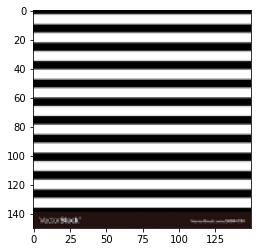

In [50]:
CATEGORIES = ["horizontal","vertical"]
speciment = 1


prediction = model.predict(np.array([X[speciment]]))
prediction = prediction[0].tolist()

print(CATEGORIES[prediction.index(max(prediction))],f"  {max(prediction)}%\n")
plt.imshow(X[speciment])

In [51]:
import cv2

1/1 [==============================] - 0s 21ms/step
[0.0003586570965126157, 0.9996412992477417]
vertical   99.96412992477417%



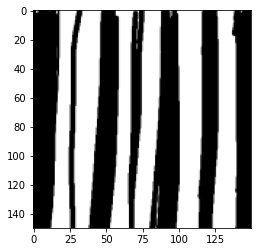

In [52]:
my_image = cv2.imread(r"11ded.png")
my_image = cv2.resize(my_image, (150, 150))
my_image = my_image/255

prediction = model.predict(np.array([my_image]))
prediction = prediction[0].tolist()
print(prediction)

print(CATEGORIES[prediction.index(max(prediction))],f"  {max(prediction) * 100}%\n")
plt.imshow(my_image)

In [53]:
model.save(f"{NAME}_{epochs}epochs.h5")